In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [230]:
df=pd.read_csv('Electric_Production.csv', index_col='DATE', parse_dates=True)

In [231]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


<AxesSubplot:xlabel='DATE'>

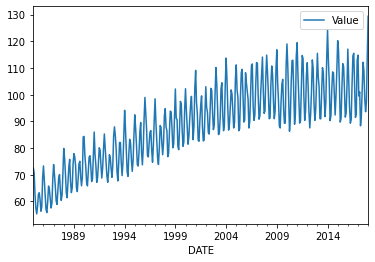

In [233]:
df.plot()

<Figure size 432x288 with 0 Axes>

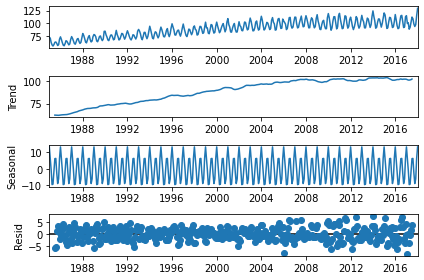

In [234]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df)

fig = plt.figure()  
fig = result.plot()

# ARIMA MODELING

In [236]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df.Value.dropna())
print(f'ADF Statistics:{result[0]}')
print(f'p-value:{result[1]}')

ADF Statistics:-2.2569903500472455
p-value:0.18621469116586759


In [237]:
result=adfuller(df.Value.diff().dropna())
print(f'ADF Statistics:{result[0]}')
print(f'p-value:{result[1]}')

ADF Statistics:-7.104890882267354
p-value:4.077786565538474e-10


Now the series looks stationary with a 1-order difference

## ACF AND PACF

In [238]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

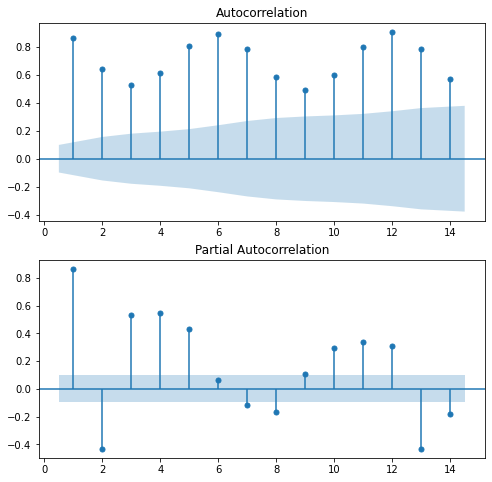

In [239]:
fig, (ax1, ax2)=plt.subplots(2,1,figsize=(8,8))

plot_acf(df,lags=14, zero=False, ax=ax1)
plot_pacf(df,lags=14, zero=False, ax=ax2)
plt.show()

The series looks indeed non stationary

## AUTO ARIMA

In [240]:
import pmdarima as pm

In [241]:
results=pm.auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                    seasonal=True, m=6, D=1, start_P=1, start_Q=1, max_P=2, max_Q=2, information_criterion='aic', trace=True, error_action='ignore', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1912.925, Time=0.52 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2404.500, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=1998.731, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2057.803, Time=0.15 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=2000.250, Time=0.33 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=1880.044, Time=0.49 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=inf, Time=1.25 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=inf, Time=0.93 sec
 ARIMA(0,1,1)(2,1,1)[6]             : AIC=1925.181, Time=0.38 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=1942.791, Time=0.30 sec
 ARIMA(2,1,1)(2,1,1)[6]             : AIC=1881.313, Time=0.89 sec
 ARIMA(1,1,2)(2,1,1)[6]             : AIC=1880.682, Time=0.72 sec
 ARIMA(0,1,0)(2,1,1)[6]             : AIC=1955.485, T

In [247]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df,order=(2,1,2),  seasonal_order=(1, 1, 2, 6))
results=model.fit()

In [248]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Value   No. Observations:                  397
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 6)   Log Likelihood                -899.089
Date:                           Mon, 05 Jul 2021   AIC                           1814.177
Time:                                   11:40:02   BIC                           1845.907
Sample:                               01-01-1985   HQIC                          1826.755
                                    - 01-01-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0873      0.350     -0.249      0.803      -0.773       0.599
ar.L2          0.2828      0.214      1.321      0.187      -0.137       0.702
ma.L1         -0.2982      0.337     -0.884      0.377      -0.959       0.363
ma.L2         -0.6397      0.329     -1.944      0.052      -1.285       0.005
ar.S.L6       -0.9976      0.003   -380.177      0.000      -1.003      -0.992
ma.S.L6        0.1145      0.040      2.832      0.005       0.035       0.194
ma.S.L12      -0.7764      0.037    -20.853      0.000      -0.849      -0.703
sigma2         5.5549      0.307     18.092      0.000       4.953       6.157
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                42.26
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.75   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# ARIMA MODEL FIT

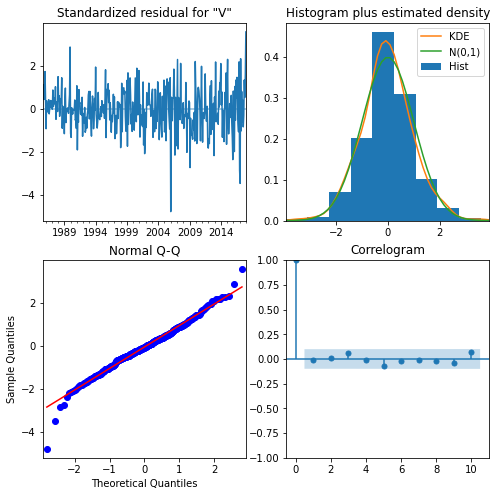

In [249]:
# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(8,8))
plt.show()

# SARIMA PREDICTION

In [250]:
prediction = results.get_prediction(start=-24)
mean_prediction=prediction.predicted_mean

mean_prediction.size

24

In [251]:
confi_int_p=prediction.conf_int()
lower_limits_p=confi_int_p.iloc[:,0]
upper_limits_p=confi_int_p.iloc[:,1]
confi_int_p.shape

(24, 2)

In [252]:
pred_dates=np.asarray(mean_prediction.index)
dates=np.asarray(df.index)

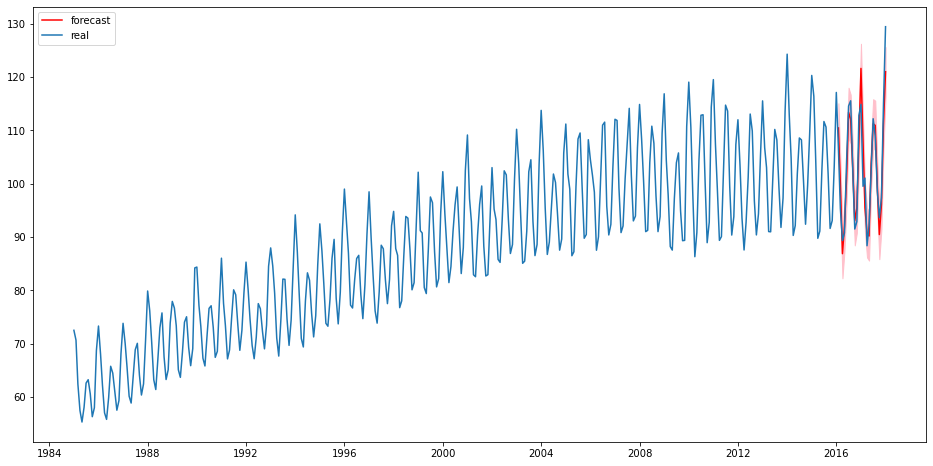

In [253]:
plt.figure(figsize=(16,8))
plt.plot(pred_dates,mean_prediction.values,color='red',label='forecast')
plt.fill_between(pred_dates, lower_limits_p, upper_limits_p, color='pink')
plt.plot(dates,df.values, label='real')
plt.legend()
plt.show()

# SARIMA FORECAST

In [254]:
# Make ARIMA forecast of next 10 values
forecast = results.get_forecast(steps=36)
mean_forecast=forecast.predicted_mean
mean_forecast.size

36

In [255]:
confi_int_f=forecast.conf_int()
lower_limits_f=confi_int_f.iloc[:,0]
upper_limits_f=confi_int_f.iloc[:,1]

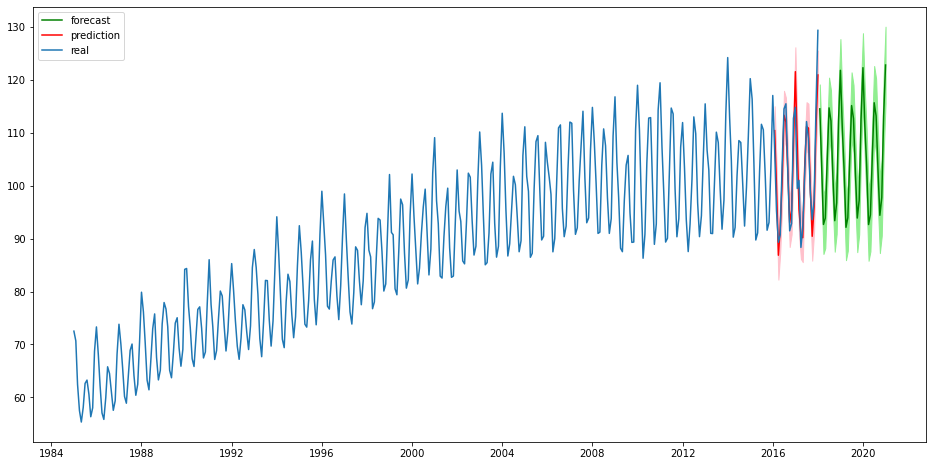

In [256]:
forec_dates=np.asarray(mean_forecast.index)
pred_dates=np.asarray(mean_prediction.index)
dates=np.asarray(df.index)
plt.figure(figsize=(16,8))
plt.plot(forec_dates,mean_forecast.values,color='green',label='forecast')
plt.fill_between(forec_dates, lower_limits_f, upper_limits_f, color='lightgreen')

plt.plot(pred_dates,mean_prediction.values,color='red',label='prediction')
plt.fill_between(pred_dates, lower_limits_p, upper_limits_p, color='pink')

plt.plot(dates,df.values, label='real')
plt.legend(loc='upper left')
plt.show()